<a href="https://colab.research.google.com/github/uyminhtri2702/AI/blob/main/Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#liên kết với gg Drive
from google.colab import drive
drive.mount( '/content/gdrive' )

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [25]:
# Thêm các thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [26]:
# Xem hinh anh tap training và val
train = '/content/gdrive/MyDrive/Colab Notebooks/10monanvn/test'
val_data = '/content/gdrive/MyDrive/Colab Notebooks/10monanvn/train'
data = tf.keras.preprocessing.image_dataset_from_directory(train)

Found 180 files belonging to 10 classes.


In [30]:
#Định dạng hình ảnh đầu vào
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split = 0.2)

In [29]:
#định dạng kích thước hình ảnh
height = 228
width = 228
channels = 3
batch_size = 32
img_shape = (height, width, channels)
img_size = (height, width)

In [31]:
# Preprocessing
train_data = datagen.flow_from_directory(
    train,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = datagen.flow_from_directory(
    train,
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 145 images belonging to 10 classes.
Found 35 images belonging to 10 classes.


In [32]:
#hiện thị số lớp hình ảnh
num_classes = len(data.class_names)
print('.... Number of Classes : {0} ....'.format(num_classes))

.... Number of Classes : 10 ....


In [34]:
# Reshape Data
def show_img(data):
    plt.figure(figsize=(15,15))
    for images, labels in data.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            ax.imshow(images[i].numpy().astype("uint8"))
            ax.axis("off")
def show_img(val):
    plt.figure(figsize=(15,15))
    for images, labels in val.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            ax.imshow(images[i].numpy().astype("uint8"))
            ax.axis("off")

In [36]:
# load pre-trained InceptionV3
pre_trained = InceptionV3(weights='imagenet', include_top=False, input_shape=img_shape, pooling='avg')

for layer in pre_trained.layers:
    layer.trainable = False

87924736/87910968 [==============================] - 0s 0us/step


In [37]:
# Khoi tao model 
x = pre_trained.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs = pre_trained.input, outputs = predictions)
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
#huấn luyện
STEP_SIZE_TRAIN = train_data.n // train_data.batch_size
STEP_SIZE_VALID = val_data.n // val_data.batch_size

history = model.fit_generator(train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = val_data,
                    validation_steps = STEP_SIZE_VALID,
                    epochs = 20,
                    verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
4/4 [==============================] - 36s 5s/step - loss: 1.2655 - accuracy: 0.6328 - val_loss: 1.3698 - val_accuracy: 0.6250
Epoch 2/20
4/4 [==============================] - 5s 1s/step - loss: 0.0928 - accuracy: 0.9823 - val_loss: 0.9318 - val_accuracy: 0.6875
Epoch 3/20
4/4 [==============================] - 4s 998ms/step - loss: 0.1073 - accuracy: 0.9453 - val_loss: 1.5899 - val_accuracy: 0.6250
Epoch 4/20
4/4 [==============================] - 4s 1s/step - loss: 0.0368 - accuracy: 0.9735 - val_loss: 1.3005 - val_accuracy: 0.6250
Epoch 5/20
4/4 [==============================] - 3s 916ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.2853 - val_accuracy: 0.6875
Epoch 6/20
4/4 [==============================] - 3s 897ms/step - loss: 0.0271 - accuracy: 0.9823 - val_loss: 0.8313 - val_accuracy: 0.8125
Epoch 7/20
4/4 [==============================] - 3s 1s/step - loss: 0.0497 - accuracy: 0.9823 - val_loss: 1.4609 - val_accuracy: 0.7188
Epoch 8/20
4/4 [===============

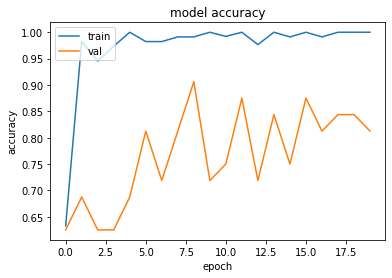

In [39]:
#Vẽ biểu đồ huấn luyện
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
#Lưu mô hình huấn luyện
model.save('Food.h5')
from keras.models import load_model
Food=load_model('Food.h5')

In [41]:
#in mô hình huấn luyện
score = model.evaluate(train_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  0.10787716507911682
Độ chính xác kiểm tra là:  0.9655172228813171


In [42]:
class_map = train_data.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [43]:
#Test
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(228, 228))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)

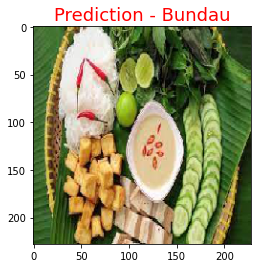

In [44]:
predict_image('/content/gdrive/MyDrive/Colab Notebooks/10monanvn/download.jpg', model)